## What Does This Piece of Code Do?
It basically takes in a root file produced by AnaTop from a TRUTH3 DxAOD and spits out vital jet and particle information from there.
## How do I run it? 
First, make sure that you have all the packages installed which are imported. Then set up a virtual python environment, preferably using conda or pip with exactly the same python3 version for which CERN ROOT was compiled on your machine. Then, as usual, run the notebook cell by cell with your own modifications.
## Where is the documentation for uproot?
Here: [Uproot](https://uproot.readthedocs.io/en/latest/basic.html)

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import uproot as ur
import matplotlib.pyplot as plt
import time
import ROOT as root
from IPython.display import display, HTML

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

from math import sqrt
from math import log

Welcome to JupyROOT 6.25/01


In [2]:
lqdtuple = "./ROOT_Files/anatop_output_LQD.root"
f = ur.open(lqdtuple)
#print(f.classnames())
display("The keys in this file are:")
display(f.keys())

'The keys in this file are:'

['mujets_particle;1',
 'mujets_particle/cutflow;1',
 'mujets_particle/cutflow_mc;1',
 'mujets_particle/cutflow_pu;1',
 'mujets_particle/cutflow_zvtx;1',
 'mujets_particle/cutflow_mc_pu;1',
 'mujets_particle/cutflow_mc_pu_zvtx;1',
 'mujets_particle/cutflow_scale_factors;1',
 'mujets_particle/cutflow_btag_scale_factors;1',
 'mujets_particle/cutflow_particle_level;1',
 'mujets_particle/cutflow_particle_level_mc;1',
 'mujets_particle/event_mu;1',
 'mujets_particle/mc_weight;1',
 'mujets_particle/jvt_SF;1',
 'mujets_particle/pileup_weight;1',
 'mujets_particle/el_n;1',
 'mujets_particle/el_pt;1',
 'mujets_particle/el_eta;1',
 'mujets_particle/el_phi;1',
 'mujets_particle/el_charge;1',
 'mujets_particle/el_true_type;1',
 'mujets_particle/mu_n;1',
 'mujets_particle/mu_pt;1',
 'mujets_particle/mu_eta;1',
 'mujets_particle/mu_phi;1',
 'mujets_particle/mu_charge;1',
 'mujets_particle/mu_true_type;1',
 'mujets_particle/ph_n;1',
 'mujets_particle/ph_pt;1',
 'mujets_particle/ph_eta;1',
 'mujets_par

In [3]:
tree = f["particleLevel"] #Access Particle Level Info
dfall = tree.arrays(library="pd") #Using Pandas Library
print('The dataframe type for selected TTree belongs to:', type(dfall))
#print(dfall)

The dataframe type for selected TTree belongs to: <class 'tuple'>


In [4]:
tree = f["particleLevel"]["jet_pt"] #Directly access the jet_pt variable in the tree/data frame
dfall = tree.arrays(library="pd")   #Using Pandas Library
print("The selected var type is:", type(dfall))
print("The dataframe shape is:", dfall.shape)
#print(dfall) #Bad idea to print entire dataframe
print(dfall.iloc[0]) # Get what's in the first item of the given data object
#Get first 14 entries of the variable, subentry number is disregraded. Indexing is with respect to
display(dfall.head(14)) #Print some nicely for debugging

The selected var type is: <class 'pandas.core.frame.DataFrame'>
The dataframe shape is: (8912, 1)
jet_pt    1439776.875
Name: (0, 0), dtype: float32


jet_pt
entry subentry              
0     0         1.439777e+06
      1         8.726814e+05
      2         6.200070e+05
      3         4.208001e+05
      4         2.964877e+05
      5         5.348518e+04
      6         2.697655e+04
1     0         7.369804e+05
      1         6.178489e+05
      2         5.992792e+05
      3         5.348192e+05
      4         2.717223e+05
      5         1.150813e+05
      6         1.141008e+05

In [5]:
tree1 = f["particleLevel"]["jet_pt"] #Directly access the jet_pt variable in the tree/data frame
dfall1 = tree1.arrays(library="np")  #Using Numpy Library
display("The data type is:",type(dfall1))
#print(dfall1.items)
#print(np.asarray(dfall1))
a=list(dfall1.values())[0] #This gets all entries of the selected variable
#print(a)#Bad idea to print all, populates the IPYNB
display(a[0][0]) #Print first item

'The data type is:'

dict

1439776.9

In [6]:
temp_tree1 = f["particleLevel"]
tree_info=temp_tree1.show()

print(tree_info)

print("_______________________")
print(type(temp_tree1))
print("_______________________")
print(temp_tree1.keys)
print("_______________________")
print(temp_tree1.typenames)
print("_______________________")
print(temp_tree1.values)
print("_______________________")

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
weight_mc            | float                    | AsDtype('>f4')
eventNumber          | uint64_t                 | AsDtype('>u8')
runNumber            | uint32_t                 | AsDtype('>u4')
mcChannelNumber      | uint32_t                 | AsDtype('>u4')
mu                   | float                    | AsDtype('>f4')
mu_actual            | float                    | AsDtype('>f4')
weight_pileup        | float                    | AsDtype('>f4')
el_pt                | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
el_eta               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
el_phi               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
el_e                 | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
el_charge            | std::vector<float>       | AsJagged(

(8912,)

Info in <TCanvas::Print>: png file JetpTAll.png has been created


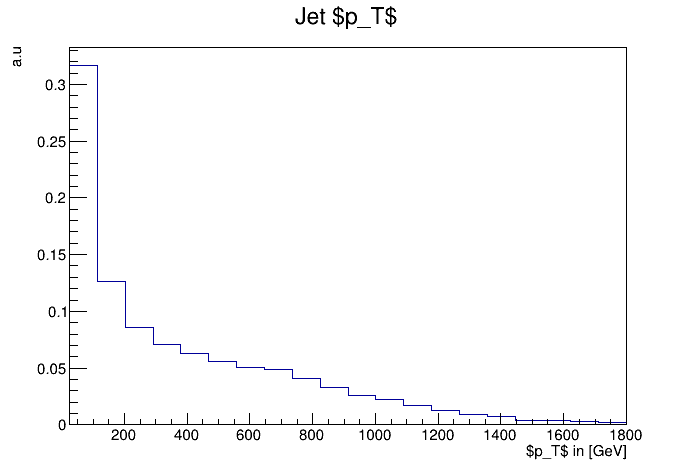

In [7]:
jpt=(1e-3)*np.concatenate(np.asarray(f["particleLevel"]["jet_pt"])).ravel()
display(jpt.shape)
#display(jpt) #We don't want the full array dumped here
#display("_______________________")

root.gROOT.ForceStyle()
root.gStyle.SetOptStat(0)
c1 = root.TCanvas()
h1  = root.TH1F( 'hist', 'Jet $p_T$;$p_T$ in [GeV];a.u', 20, 25,1800)
for i in range(jpt.shape[0]):
    h1.Fill(jpt[i])
    #print(jpt[i])
h1.Scale(1./h1.GetEntries());
h1.Draw("HIST")
c1.Draw()
c1.SaveAs("JetpTAll.png")

dict

dict

(5831,)

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Info in <TCanvas::Print>: png file JetpTLQ.png has been created


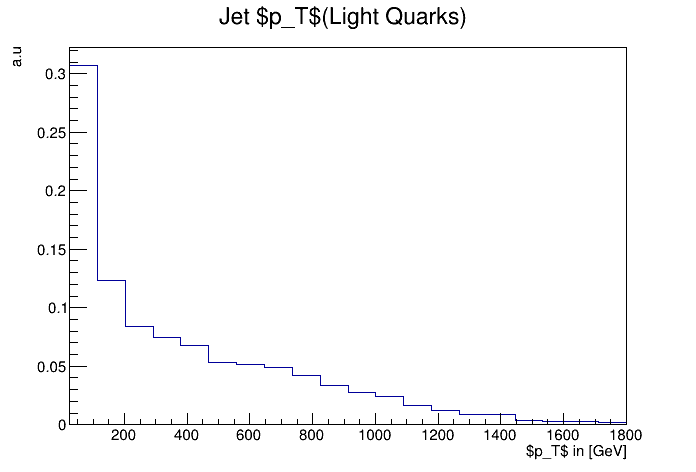

In [8]:
#That's because we can't supply np.absolute within cut selection strings
#Thus PDG IDs of AntiParticles have to be given as another selection

dfall1 = temp_tree1.arrays(["jet_pt"],"PDFinfo_PDGID1 == 1",library="np")
dfall2 = temp_tree1.arrays(["jet_pt"],"PDFinfo_PDGID1 ==-1",library="np") 
dfall3 = temp_tree1.arrays(["jet_pt"],"PDFinfo_PDGID1 == 2",library="np")
dfall4 = temp_tree1.arrays(["jet_pt"],"PDFinfo_PDGID1 ==-2",library="np") 
display(type(dfall1),type(dfall2))

a1=np.concatenate(np.asarray(list(dfall1.values())[0])).ravel() #ravel is important for flattening here
a2=np.concatenate(np.asarray(list(dfall2.values())[0])).ravel()
a3=np.concatenate(np.asarray(list(dfall3.values())[0])).ravel()
a4=np.concatenate(np.asarray(list(dfall4.values())[0])).ravel()
a00 = (1e-3)*np.asarray(np.concatenate((a1,a2),axis=0).ravel())
a01 = (1e-3)*np.asarray(np.concatenate((a3,a4),axis=0).ravel())
a   = np.asarray(np.concatenate((a00,a01),axis=0).ravel())

display(a.shape)
root.gROOT.ForceStyle()
root.gStyle.SetOptStat(0)
c2 = root.TCanvas()
h2  = root.TH1F( 'hist', 'Jet $p_T$(Light Quarks);$p_T$ in [GeV];a.u', 20, 25,1800)
for i in range(a.shape[0]):
    h2.Fill(a[i])
h2.Scale(1./h2.GetEntries());
h2.Draw("HIST")
c2.Draw()
c2.SaveAs("JetpTLQ.png")

<class 'dict'>
_______________________
(993,)


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Info in <TCanvas::Print>: png file MuonpT.png has been created


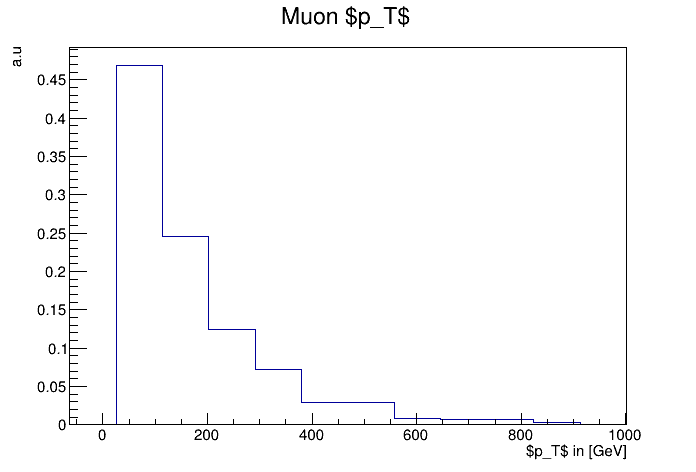

In [9]:
dfall1 = temp_tree1.arrays(["mu_pt"],library="np")
print(type(dfall1))
print("_______________________")

a = (1e-3)*np.concatenate(np.asarray(list(dfall1.values())[0])).ravel()
print(a.shape)
#display(a)
root.gROOT.ForceStyle()
root.gStyle.SetOptStat(0)
c2 = root.TCanvas()
h2  = root.TH1F( 'hist', 'Muon $p_T$;$p_T$ in [GeV];a.u', 20, 25,1800)
for i in range(a.shape[0]):
    h2.Fill(a[i])
h2.Scale(1./h2.GetEntries());
h2.GetXaxis().SetRangeUser(0, 1e3);
h2.Draw("HIST")
c2.Draw()
c2.SaveAs("MuonpT.png")